<a href="https://colab.research.google.com/github/venkat2ram/Python/blob/master/NN_using_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import fetch_openml

Data=fetch_openml('mnist_784')

In [0]:
X,y_actual=Data["data"][:1000]/10000,Data["target"][:1000]

In [0]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

def show_imag(X,y_actual,position):
  img=X[position]
  imag=img.reshape(int(np.sqrt(img.size)),int(np.sqrt(img.size)))
  plt.imshow(imag,cmap = matplotlib.cm.binary, interpolation="nearest")
  plt.show()
  print(y_actual[position]) 

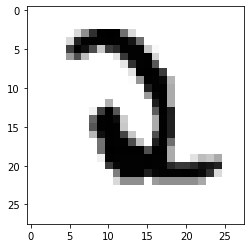

2


In [5]:
show_imag(X,y_actual,400)

In [0]:
def convert_binary(y_actual):
  y1=np.zeros((len(y_actual),10))
  for i in range(len(y_actual)):
    y1[i][int(y_actual[i])]=1
    
    
  return y1

In [0]:
NumHlayers=10
NumHunits=30

In [8]:
y=convert_binary(y_actual)
m,n=np.shape(X)
p,s=np.shape(y)
X_with_bias=np.c_[np.ones((m,1)),X]
hidden=np.ones((NumHlayers,m,NumHunits+1))
z=np.ones((NumHlayers,m,NumHunits))
a=np.ones((NumHlayers,m,NumHunits))
d=np.ones((NumHlayers,m,NumHunits+1))
ITheta=np.random.rand(n+1,NumHunits)
#Igrad=np.zeros((n+1,NumHunits))
HTheta=np.random.rand(NumHlayers-1,NumHunits+1,NumHunits)
HTGrad=np.random.rand(NumHlayers-1,NumHunits+1,NumHunits)
HGrad=np.zeros((NumHlayers,NumHunits+1))
ETheta=np.random.rand(NumHunits+1,s)
#EGrad=np.zeros((NumHunits+1,s))
for rota in range(10):
  z[0]=np.matmul(X_with_bias,ITheta)
  a[0]=1/(1+np.exp(-1*z[0]))
  hidden[0]=np.c_[np.ones((m,1)),a[0]]
  for i in range(NumHlayers-1):
    z[i+1]=np.matmul(hidden[i],HTheta[i])
    a[i+1]=1/(1+np.exp(-1*z[i+1]))
    hidden[i+1]=np.c_[np.ones((m,1)),a[i+1]]
  pred=1/(1+np.exp(-1*np.matmul(hidden[i+1],ETheta)))
  cost=sum(((pred-y)**2).transpose()).reshape(-1,1)
  print(sum(cost))
  dpred=pred-y
  #Egrad_init=np.zeros((m,NumHunits+1,s))
  Egrad=np.matmul((hidden[NumHlayers-1].transpose()),(2*dpred)*(pred*(1-pred)))/1000
  HGrad[NumHlayers-1]=sum(np.matmul((2*dpred*pred*(1-pred)),ETheta.transpose())).reshape(1,-1)/1000
  for j in range(NumHlayers-1):
    k=NumHlayers-j-2
    HTGrad[k]=np.matmul((sum(hidden[k]).reshape(1,-1)/1000).transpose(),((((sum(a[k+1])/1000).reshape(1,-1))*(((sum(1-a[k+1])/1000).reshape(1,-1))))*(HGrad[k+1,1:NumHunits+1].reshape(1,-1))))
    HGrad[k]=np.matmul(((((sum(a[k+1])/1000).reshape(1,-1))*(((sum(1-a[k+1])/1000).reshape(1,-1))))*(HGrad[k+1,1:NumHunits+1].reshape(1,-1))),HTheta[8].transpose())
  ETheta=ETheta+Egrad
  HTheta=HTheta+HTGrad

  
  



[8999.99347594]
[8999.99347622]
[8999.9934765]
[8999.99347677]
[8999.99347705]
[8999.99347733]
[8999.99347761]
[8999.99347789]
[8999.99347817]
[8999.99347844]


In [9]:
k=8
((((sum(a[k+1])/1000).reshape(1,-1))*(((sum(1-a[k+1])/1000).reshape(1,-1))))*(HGrad[k+1,1:NumHunits+1].reshape(1,-1))).shape


(1, 30)

In [10]:
sum(cost)

array([8999.99347844])

In [11]:
(HGrad[9,1:31].reshape(1,-1))

array([[3.72599370e-06, 2.74533535e-06, 1.54222624e-06, 4.35861299e-06,
        3.24414073e-06, 2.98658353e-06, 1.31550039e-06, 2.84744345e-06,
        1.95975389e-06, 2.05139183e-06, 3.61617283e-06, 3.97921995e-06,
        3.30484254e-06, 2.70045251e-06, 3.67050658e-06, 4.58372738e-06,
        4.43685408e-06, 3.81177822e-06, 3.75496295e-06, 3.37183008e-06,
        2.11301142e-06, 4.45426641e-06, 3.28217752e-06, 3.85870459e-06,
        2.65002675e-06, 3.15192863e-06, 1.35552641e-06, 2.02232930e-06,
        1.73763162e-06, 2.29790566e-06]])

In [12]:
HGrad[9]

array([2.73485004e-06, 3.72599370e-06, 2.74533535e-06, 1.54222624e-06,
       4.35861299e-06, 3.24414073e-06, 2.98658353e-06, 1.31550039e-06,
       2.84744345e-06, 1.95975389e-06, 2.05139183e-06, 3.61617283e-06,
       3.97921995e-06, 3.30484254e-06, 2.70045251e-06, 3.67050658e-06,
       4.58372738e-06, 4.43685408e-06, 3.81177822e-06, 3.75496295e-06,
       3.37183008e-06, 2.11301142e-06, 4.45426641e-06, 3.28217752e-06,
       3.85870459e-06, 2.65002675e-06, 3.15192863e-06, 1.35552641e-06,
       2.02232930e-06, 1.73763162e-06, 2.29790566e-06])

In [13]:
HTGrad[8]

array([[7.88657432e-13, 1.25892043e-13, 9.50685416e-14, 1.00886398e-13,
        1.17439491e-12, 3.81609722e-12, 3.83198788e-15, 6.51157837e-14,
        3.91599936e-13, 6.68583703e-12, 3.26996130e-13, 6.88849122e-13,
        6.09097931e-13, 2.67878388e-12, 2.27713925e-13, 6.48521679e-13,
        3.80621008e-12, 5.55120344e-13, 3.18036362e-13, 1.95855359e-13,
        1.78226688e-11, 1.64976570e-13, 2.24434903e-13, 4.31148575e-13,
        7.63139659e-13, 8.88399078e-13, 1.04557751e-14, 2.07508963e-13,
        1.58479390e-13, 2.65100216e-13],
       [7.88656356e-13, 1.25891872e-13, 9.50684119e-14, 1.00886260e-13,
        1.17439331e-12, 3.81609202e-12, 3.83198265e-15, 6.51156949e-14,
        3.91599401e-13, 6.68582791e-12, 3.26995684e-13, 6.88848182e-13,
        6.09097100e-13, 2.67878022e-12, 2.27713614e-13, 6.48520794e-13,
        3.80620488e-12, 5.55119587e-13, 3.18035928e-13, 1.95855092e-13,
        1.78226445e-11, 1.64976345e-13, 2.24434597e-13, 4.31147987e-13,
        7.63138618e-13,

In [14]:
np.matmul((2*dpred*pred*(1-pred)),ETheta.transpose())

array([[2.81938728e-06, 3.57943245e-06, 2.92362702e-06, ...,
        2.22545276e-06, 1.87935192e-06, 1.94541821e-06],
       [2.84518273e-06, 1.95898349e-06, 1.52045637e-06, ...,
        2.06546722e-06, 1.57815616e-06, 1.89093020e-06],
       [2.97364571e-06, 4.06881670e-06, 3.00588084e-06, ...,
        2.20118036e-06, 1.89048119e-06, 2.51489420e-06],
       ...,
       [2.84518273e-06, 1.95898349e-06, 1.52045637e-06, ...,
        2.06546722e-06, 1.57815616e-06, 1.89093020e-06],
       [2.44484663e-06, 3.53142002e-06, 2.67056850e-06, ...,
        1.71464701e-06, 1.57445138e-06, 2.49251432e-06],
       [2.97753098e-06, 3.93157249e-06, 3.04211611e-06, ...,
        2.26017308e-06, 1.88970553e-06, 2.52351687e-06]])

In [15]:
Egrad

array([[2.25319483e-06, 1.65375183e-06, 3.13790937e-07, 5.69872732e-07,
        7.09036690e-08, 5.61644603e-07, 1.75995558e-07, 9.14138014e-08,
        2.80653412e-07, 5.50326286e-07],
       [2.25319436e-06, 1.65375148e-06, 3.13790870e-07, 5.69872611e-07,
        7.09036540e-08, 5.61644484e-07, 1.75995521e-07, 9.14137821e-08,
        2.80653353e-07, 5.50326170e-07],
       [2.25319473e-06, 1.65375175e-06, 3.13790922e-07, 5.69872706e-07,
        7.09036658e-08, 5.61644578e-07, 1.75995550e-07, 9.14137972e-08,
        2.80653399e-07, 5.50326261e-07],
       [2.25319469e-06, 1.65375173e-06, 3.13790917e-07, 5.69872697e-07,
        7.09036646e-08, 5.61644569e-07, 1.75995548e-07, 9.14137958e-08,
        2.80653395e-07, 5.50326252e-07],
       [2.25319478e-06, 1.65375179e-06, 3.13790930e-07, 5.69872719e-07,
        7.09036674e-08, 5.61644590e-07, 1.75995554e-07, 9.14137993e-08,
        2.80653406e-07, 5.50326274e-07],
       [2.25319402e-06, 1.65375123e-06, 3.13790823e-07, 5.69872526e-07,
   

In [16]:
pred

array([[0.99999875, 0.99999906, 0.99999983, ..., 0.99999995, 0.99999985,
        0.99999969],
       [0.99999875, 0.99999906, 0.99999983, ..., 0.99999995, 0.99999985,
        0.99999969],
       [0.99999875, 0.99999906, 0.99999983, ..., 0.99999995, 0.99999985,
        0.99999969],
       ...,
       [0.99999875, 0.99999906, 0.99999983, ..., 0.99999995, 0.99999985,
        0.99999969],
       [0.99999875, 0.99999906, 0.99999983, ..., 0.99999995, 0.99999985,
        0.99999969],
       [0.99999875, 0.99999906, 0.99999983, ..., 0.99999995, 0.99999985,
        0.99999969]])

In [17]:
ETheta

array([[0.08168989, 0.53920612, 0.7692845 , 0.96158923, 0.95140952,
        0.37123984, 0.36800624, 0.87641739, 0.35711438, 0.63350045],
       [0.8671479 , 0.04979494, 0.21734035, 0.94110608, 0.68043344,
        0.87832541, 0.98401017, 0.95713141, 0.70029262, 0.15722131],
       [0.6131012 , 0.24952396, 0.12935633, 0.60435576, 0.56054644,
        0.204771  , 0.04206999, 0.63363846, 0.13415114, 0.56063054],
       [0.19086326, 0.13314766, 0.45458285, 0.09223343, 0.34534348,
        0.01318753, 0.65723233, 0.30558566, 0.00239756, 0.94601005],
       [0.66413915, 0.72568608, 0.80630718, 0.51142516, 0.55596599,
        0.78447821, 0.39732955, 0.77279813, 0.91874334, 0.43462247],
       [0.23124578, 0.87888013, 0.86271372, 0.19011686, 0.11619636,
        0.49841904, 0.9240326 , 0.79406556, 0.80115197, 0.25870251],
       [0.31322919, 0.14449758, 0.87429496, 0.93513431, 0.8961277 ,
        0.67728317, 0.79104051, 0.59727062, 0.75132801, 0.70139709],
       [0.16182179, 0.17257949, 0.5063335